# Curso de Python para Analise de Dados: **Projeto Final**

Erik Luiz Manosso

#**Tópicos**

<ol type="1">
  <li>Introdução ao Projeto;</li>
  <li>Exploração dos dados;</li>
  <li>Transformação e limpeza de dados;</li>
  <li>Visualização de dados;</li>
  <li>Storytelling e Insights.</li>
</ol>

#1\. Introdução ao Projeto

Este projeto tem por objetivo realizar a analise do banco de dados de crédito de uma instituição financeira e verificar se é possível determinar uma relação, ou mais, entre a coluna **default**, que representa se o cliente é inadimplente, e seus demais dados, como sálario, interações mensais ou limite de credito. Os dados estão em formato CSV em um arquivo que será carregado da maquina fisica para o notebook, mas também pode ser acessado pelo [link](https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv).

# 2\. Exploração dos Dados

O banco de dados que será analisa possui dezesseis (16) categorias, que englobam dados pessoais, como idade, sexo e escolaridade, e financeiros, como o salário atual, limite do cartão de credito e tipo de cartão.

Os dados estão divididos conforme a representação abaixo:



| Coluna  | Descrição |
| ------- | --------- |
| id      | Número da conta |
| default | Indica se o cliente é adimplente (0) ou inadimplente (1) |
| idade   | Idade do cliente |
| sexo    | Gênero do cliente |
| depedentes | Numero de dependentes do cliente |
| escolaridade | Nivel de escolaridade do cliente |
| estado_civil | Solteiro, Casado, Separado, Divorciado ou Viúvo |
| salario_anual | Faixa do salario mensal multiplicado por 12 |
| tipo_cartao | Categoria do cartao: blue, silver, gold e platinium |
| meses_de_relacionamento | Quantidade de meses desde a abertura da conta |
| qtd_produtos | Quantidade de produtos contratados |
| iteracoes_12m | Quantidade de iteracoes com o cliente no último ano |
| meses_inatico_12m | Quantidade de meses que o cliente ficou inativo no último ano |
| limite_credito | Valor do limite do cartão de crédito |
| valor_transacoes_12m | Soma total do valor das transações no cartão de crédito no último ano |
| qtd_transacoes_12m | Quantidade total de transações no cartão de crédito no último ano |



##2.1 Bibliotecas e arquivo de dados

Para nosso estudo de caso faremos uso das bibliotecas: pandas, seaborn e matplotlib.


Pandas será responsável pelo tratamento do bando de dados, auxiliando no acesso e consulta e eventuais alterações no banco de dados. Já as bibliotecas Seaborn e Matplotlib oferecem o suporte de gerenciamento gráfico, tornando possível a apresentação dos resultados de maneira visual para melhor entendimento.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")  #Definição de um estilo padrão para os graficos

O arquivo que contem os dados a serem analisados pode ser carregado diretamente no notebook, ou, por um link da rede que contenha o arquivo CSV de interesse. Utilizando uma função do pandas que realiza a leitura dos dados podemos começar a explorar o conteúdo.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv', na_values='na')

#df = pd.read_csv('Python_M10_support material.csv', na_values='na') #No caso de arquivo carregado diretamente na maquina

##2.2 Conferencia da estruturação dos dados e itens faltantes

Neste momento começamos a explorar o conteúdo do banco de dados e coletar informações para analise final.

Nosso foco são os clientes inadimplentes, mas é imprescindível possuir a visão geral dos clientes para termos como compará-los.

In [3]:
qtd_total, _ = df.shape
qtd_adimplentes, _ = df[df['default'] == 0].shape
qtd_inadimplentes, _ = df[df['default'] == 1].shape

print(f"O total de clientes é de {qtd_total}")
print(f"A proporcão clientes adimplentes é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")

O total de clientes é de 10127
A proporcão clientes adimplentes é de 83.93%
A proporcão clientes inadimplentes é de 16.07%


Uma analise dos tipos de dados registrados pode ser realizada, onde pode-se extrair varias informações.

In [5]:
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

In [6]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


In [7]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


Com as informações que possuímos até o momento é possível perceber que nossa tabela possui dados faltando e que alguns tipos poderiam ser alterados para facilitar o tratamento e analise.

Para os dados faltantes é importante conferir se a retirada destes itens afetara nossa analise. Por exemplo, caso todos os dados faltantes sejam de inadimplentes, podemos ter um problema.



In [9]:
def stats_dados_faltantes(df: pd.DataFrame) -> None:

  stats_dados_faltantes = []
  for col in df.columns:
    if df[col].isna().any():
      qtd, _ = df[df[col].isna()].shape
      total, _ = df.shape
      dict_dados_faltantes = {col: {'quantidade': qtd, "porcentagem": round(100 * qtd/total, 2)}}
      stats_dados_faltantes.append(dict_dados_faltantes)

  for stat in stats_dados_faltantes:
    print(stat)

In [10]:
stats_dados_faltantes(df=df)

{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}


In [11]:
stats_dados_faltantes(df=df[df['default'] == 0])

{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}


In [12]:
stats_dados_faltantes(df=df[df['default'] == 1])

{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'porcentagem': 11.49}}


Após a execução do trecho de código acima conferimos que a porcentagem de dados faltantes afeta de maneira similar o nosso dado alvo para inadimplente e adimplente, podendo serem esses dados suprimidos da nossa analise em primeiro momento, para termos um conjunto de dados completo e limpo.

#3\.Transformação e limpeza de dados

Na etapa anterior verificamos que o conjunto de dados possuía dados faltantes e alguns tipos que poderiam ser melhorados para apresentar uma melhor analise final. Podemos observar que os tipos de dados em **valor_transacoes_12m** e **qtd_transacoes_12m**, deveriam ser do tipo **float** e não **string**. Já para os dados faltantes, a conclusão foi que eles podem ser suprimidos em primeiro momento.

##3.1 Correção do Schema

Para a correção do tipo de dado basta aplicar uma função para substituir a pontuação no numero e  transformar o tipo de string para float.

In [13]:
fn = lambda valor: float(valor.replace(".", "").replace(",", "."))

In [14]:
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn)
df['limite_credito'] = df['limite_credito'].apply(fn)

Com a transformação de dados realizada, é possível perceber que cumprimos o objetivo de transpor **valor_transacoes_12m** e **qtd_transacoes_12m** de atributos categóricos para atributos numéricos.

In [15]:
df.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

In [16]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436


In [17]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.00,0.000,0.00,0.000,1.00
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


##3.2 Remoção de dados Faltantes

Para a remoção de linhas com dados faltantes com o Pandas, basta utilizar a função abaixo.

In [18]:
df.dropna(inplace=True)

In [19]:
qtd_total_novo, _ = df.shape
qtd_adimplentes_novo, _ = df[df['default'] == 0].shape
qtd_inadimplentes_novo, _ = df[df['default'] == 1].shape

print(f"A proporcão adimplentes ativos é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes adimplentes é de {round(100 * qtd_adimplentes_novo / qtd_total_novo, 2)}%")
print("")
print(f"A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes inadimplentes é de {round(100 * qtd_inadimplentes_novo / qtd_total_novo, 2)}%")

A proporcão adimplentes ativos é de 83.93%
A nova proporcão de clientes adimplentes é de 84.28%

A proporcão clientes inadimplentes é de 16.07%
A nova proporcão de clientes inadimplentes é de 15.72%


Inevitavelmente possuímos um numero menor de clientes para a comparação, porém, mantivemos as proporções similares em comparação a tabela geral.

#4\. Visualização de dados

Com os dados tratados e prontos para serem analisados, passamos para a parte comparativa e analítica, para entender o que leva um cliente a ser inadimplente.

In [23]:
df_adimplente = df[df['default'] == 0]

In [24]:
df_inadimplente = df[df['default'] == 1]

##4.1 Visualizações categóricas

Seção dedicada a comparação dos atributos categóricos com nossa variável resposta **default**

In [45]:
def grafico_categorico(coluna: str, df, df_adimplente,df_inadimplente) -> None:

  tipo_titulo = coluna.capitalize().replace("_"," ")
  titulos = [f'{tipo_titulo} dos Clientes', f'{tipo_titulo} dos Clientes Adimplentes', f'{tipo_titulo} dos Clientes Inadimplentes']

  eixo = 0
  max_y = 0
  max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1

  figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

  for dataframe in [df, df_adimplente, df_inadimplente]:

    df_to_plot = dataframe[coluna].value_counts().to_frame()
    df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
    df_to_plot[coluna] = df_to_plot.index
    df_to_plot.sort_values(by=[coluna], inplace=True)
    df_to_plot.sort_values(by=[coluna])

    f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
    f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))

    eixo += 1

  figura.show()

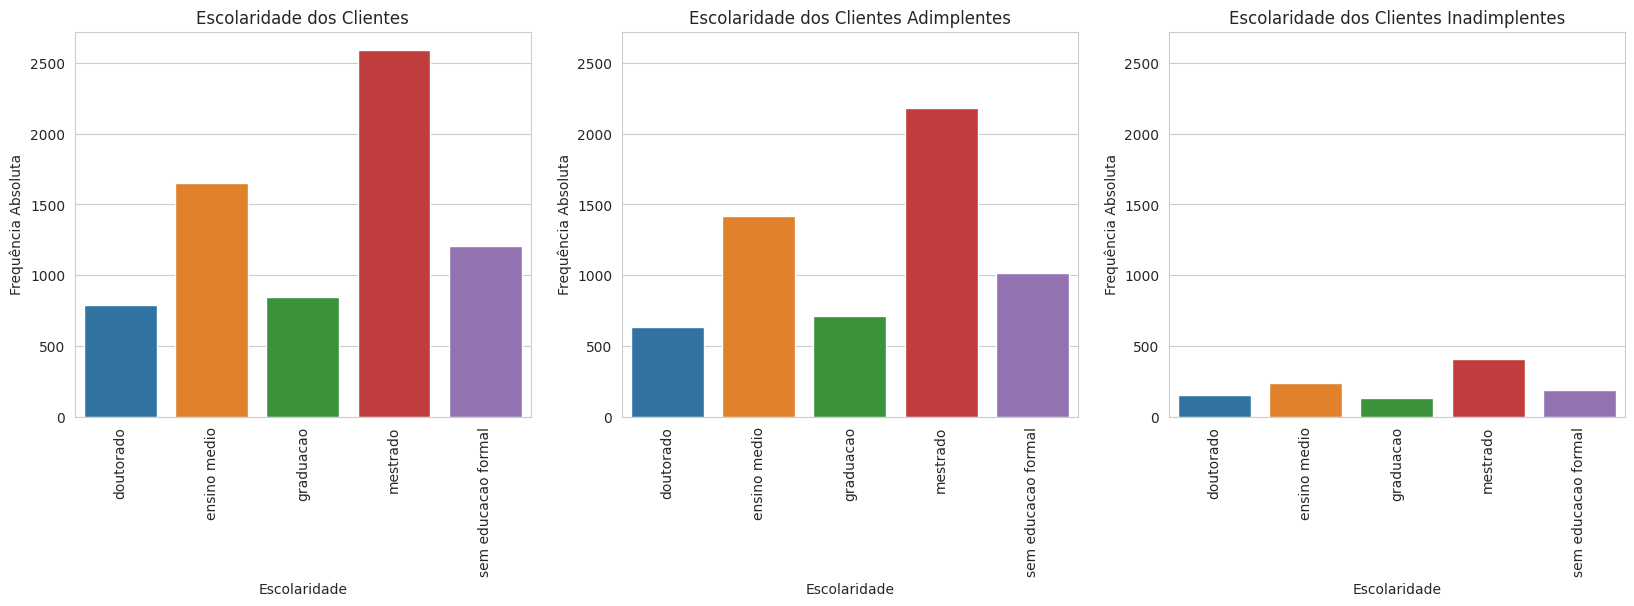

In [43]:
escolaridade = grafico_categorico(coluna='escolaridade',df=df,df_adimplente=df_adimplente,df_inadimplente=df_inadimplente)

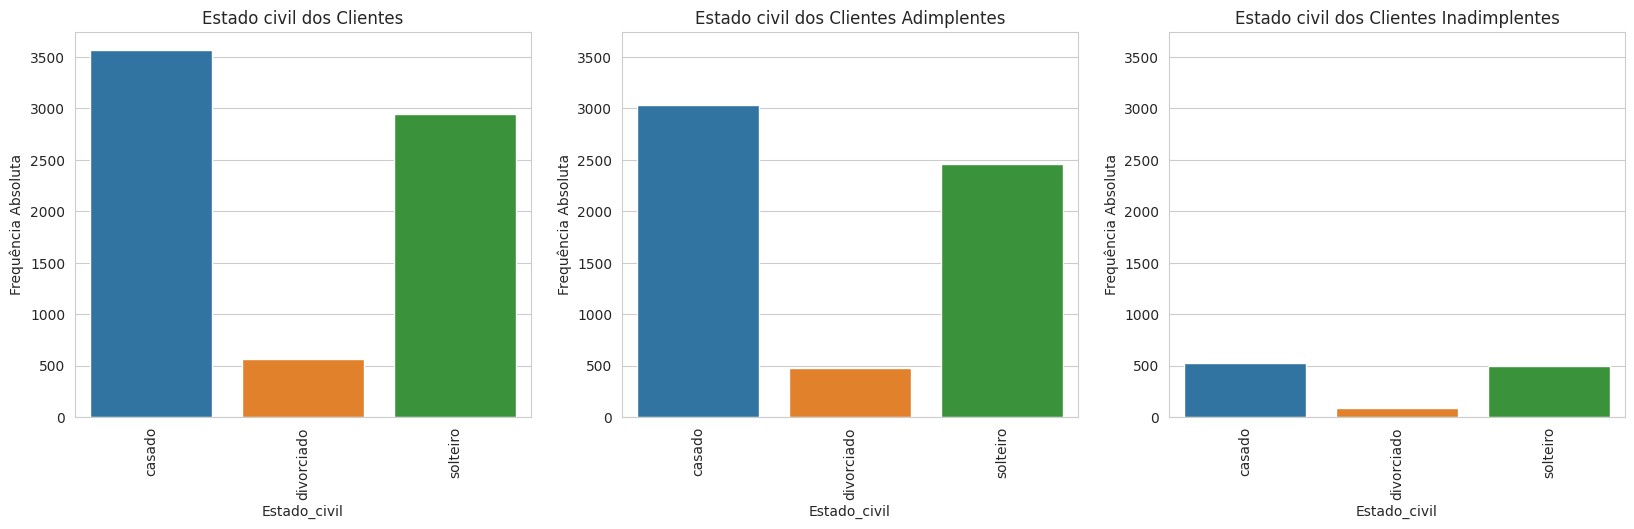

In [44]:
estado_civil = grafico_categorico(coluna='estado_civil',df=df,df_adimplente=df_adimplente,df_inadimplente=df_inadimplente)

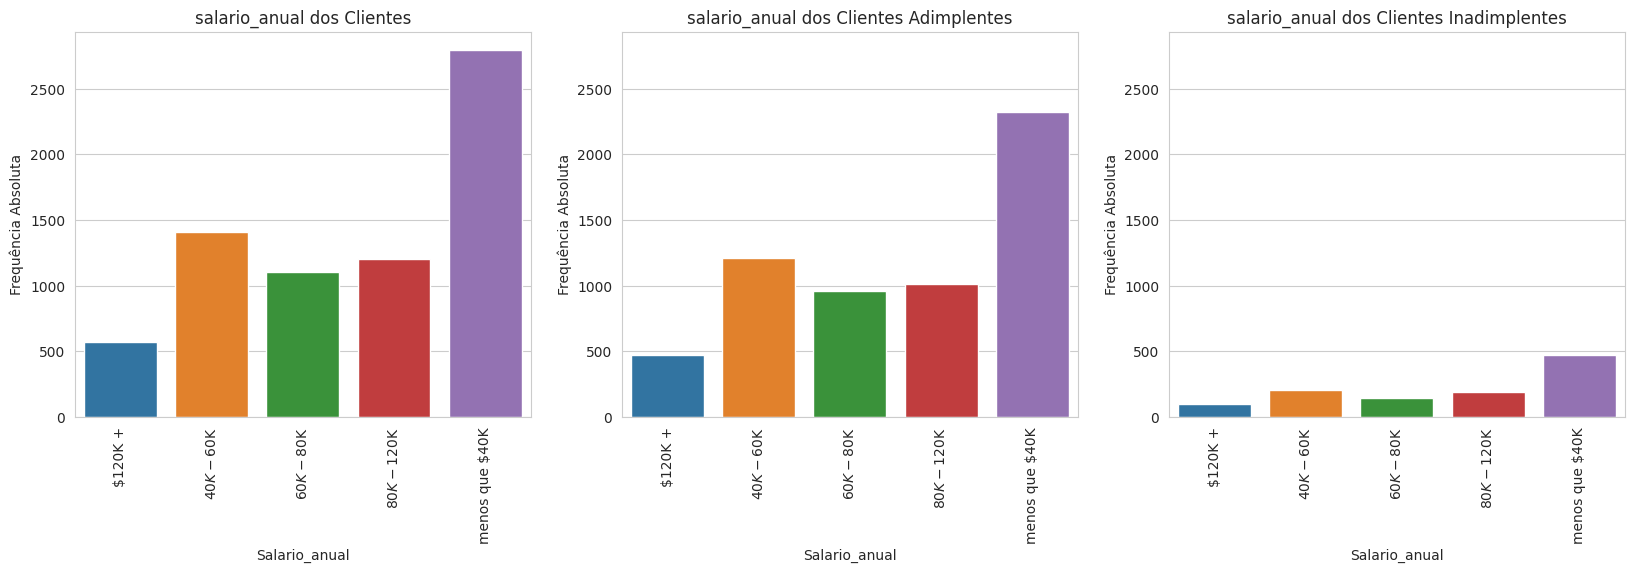

In [34]:
salario_anual = grafico_categorico(coluna='salario_anual',df=df,df_adimplente=df_adimplente,df_inadimplente=df_inadimplente)

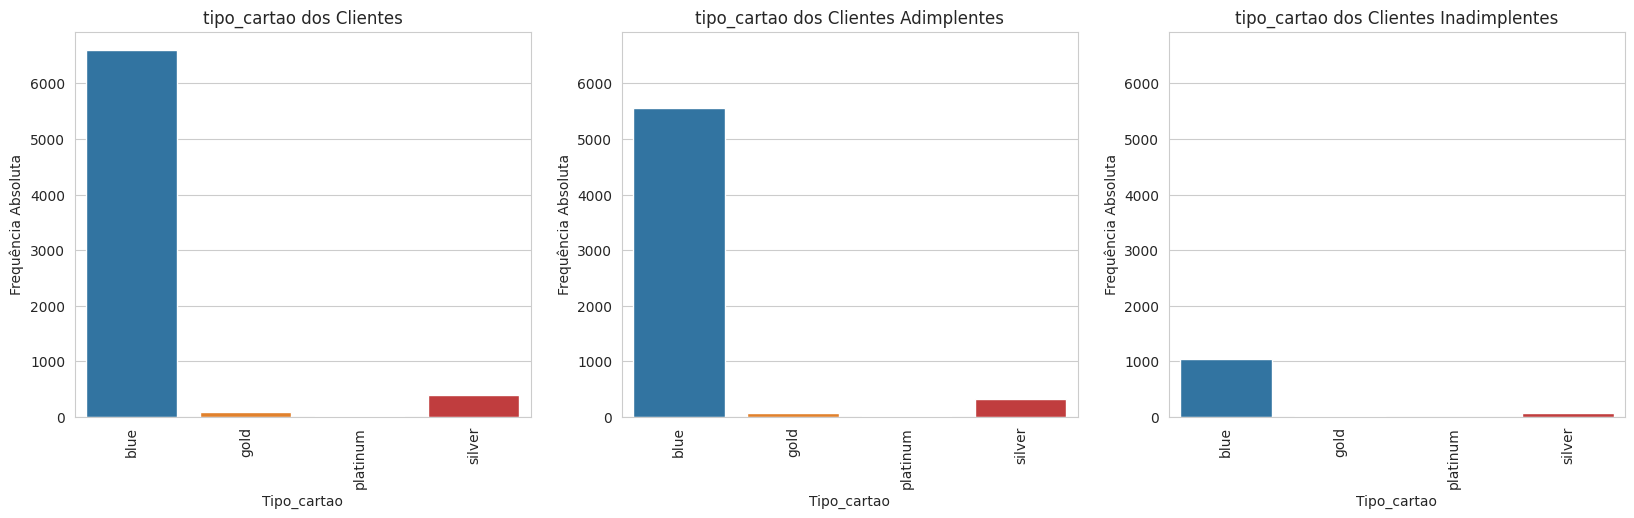

In [35]:
tipo_cartao = grafico_categorico(coluna='tipo_cartao',df=df,df_adimplente=df_adimplente,df_inadimplente=df_inadimplente)

##4.2 Visualizações numéricas

Seção dedicada a comparação dos atributos numéricas com nossa variável resposta **default**

In [71]:
def grafico_numericos(coluna: str, df, df_adimplente,df_inadimplente) -> None:

  tipo_titulo = coluna.capitalize().replace("_"," ").replace("12m","ultimos 12 Meses").replace("Qtd","Quantidade de").replace("transacoes","Transações").replace("iteracoes","Iterações")
  titulos = [f'{tipo_titulo} do Cliente', f'{tipo_titulo} de Adimplentes', f'{tipo_titulo} de Inadimplentes']

  eixo = 0
  max_y = 0
  figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

  for dataframe in [df, df_adimplente, df_inadimplente]:

    f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))

    eixo += 1

  figura.show()

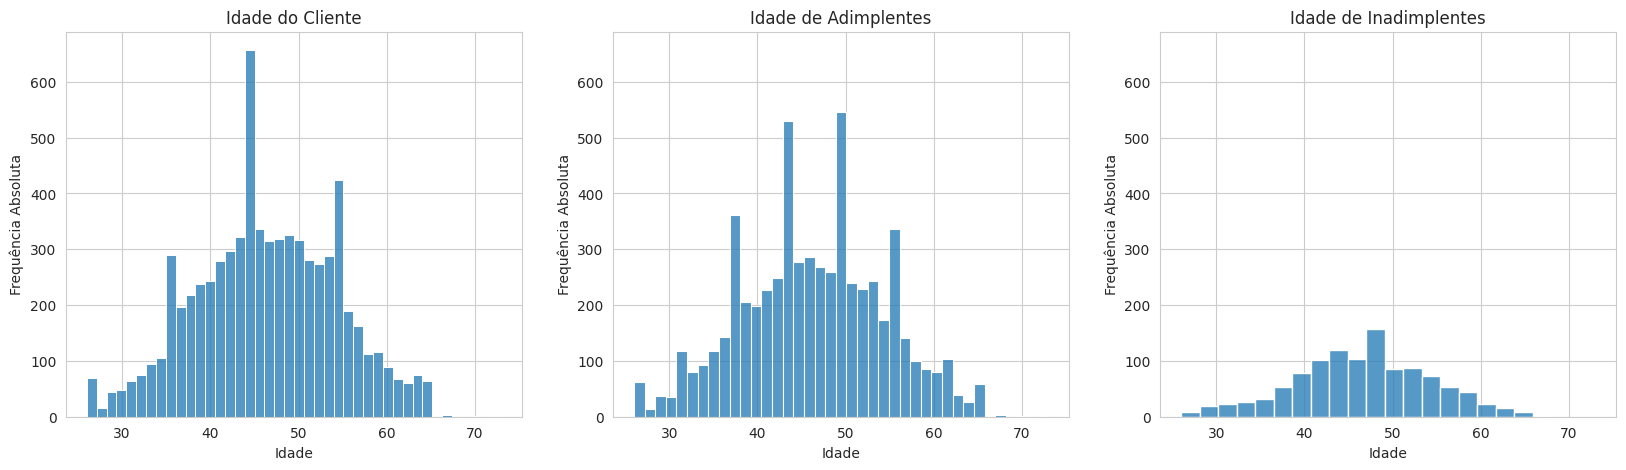

In [57]:
idade = grafico_numericos(coluna='idade',df=df,df_adimplente=df_adimplente,df_inadimplente=df_inadimplente)

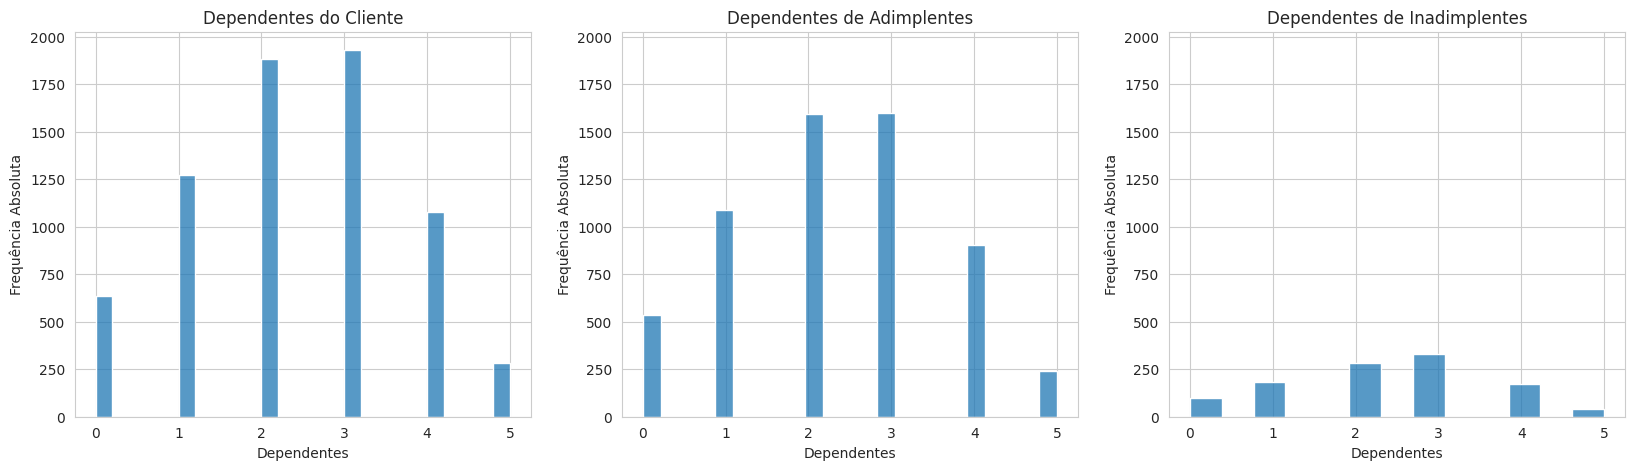

In [58]:
dependentes = grafico_numericos(coluna='dependentes',df=df,df_adimplente=df_adimplente,df_inadimplente=df_inadimplente)

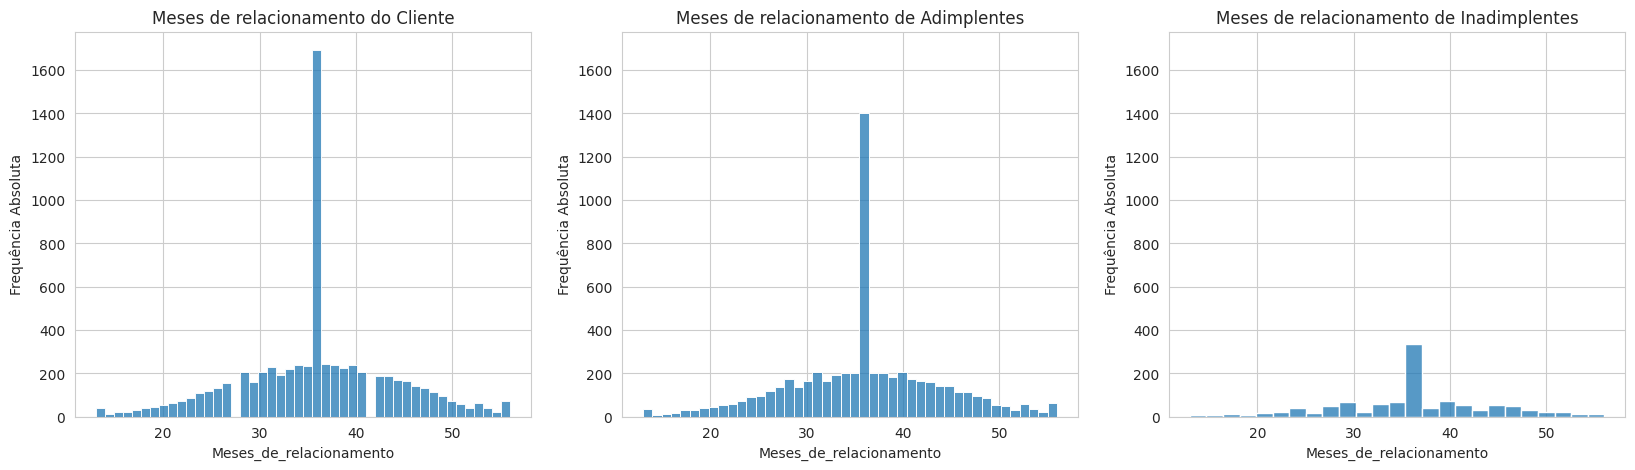

In [59]:
meses_de_relacionamento = grafico_numericos(coluna='meses_de_relacionamento',df=df,df_adimplente=df_adimplente,df_inadimplente=df_inadimplente)

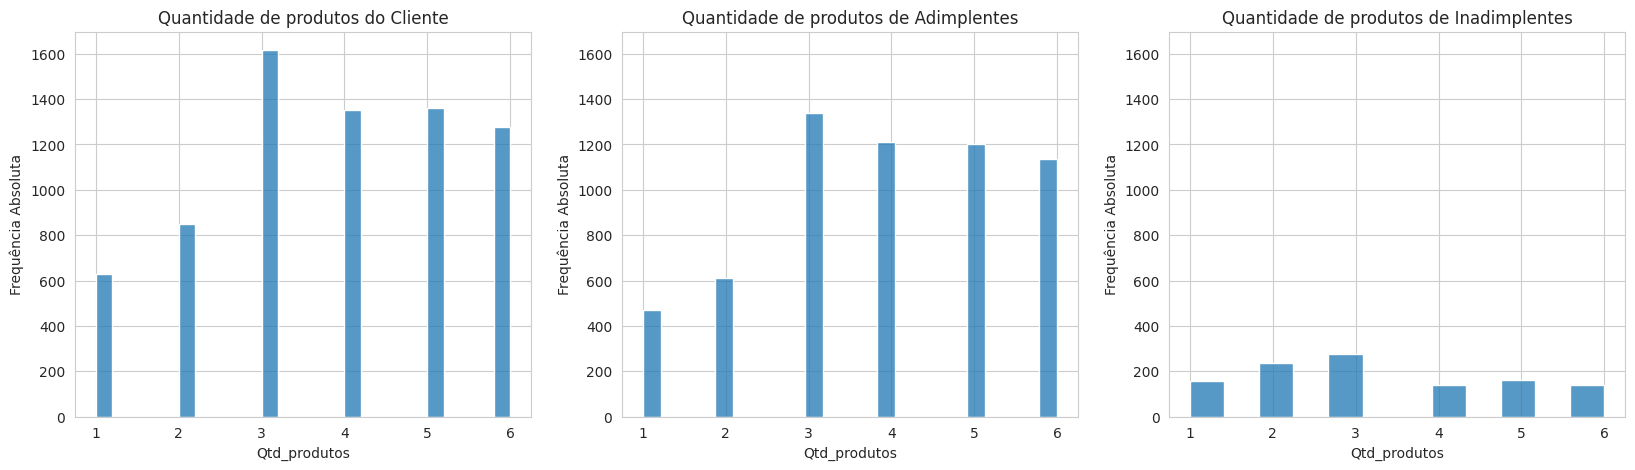

In [66]:
qtd_produtos = grafico_numericos(coluna='qtd_produtos',df=df,df_adimplente=df_adimplente,df_inadimplente=df_inadimplente)

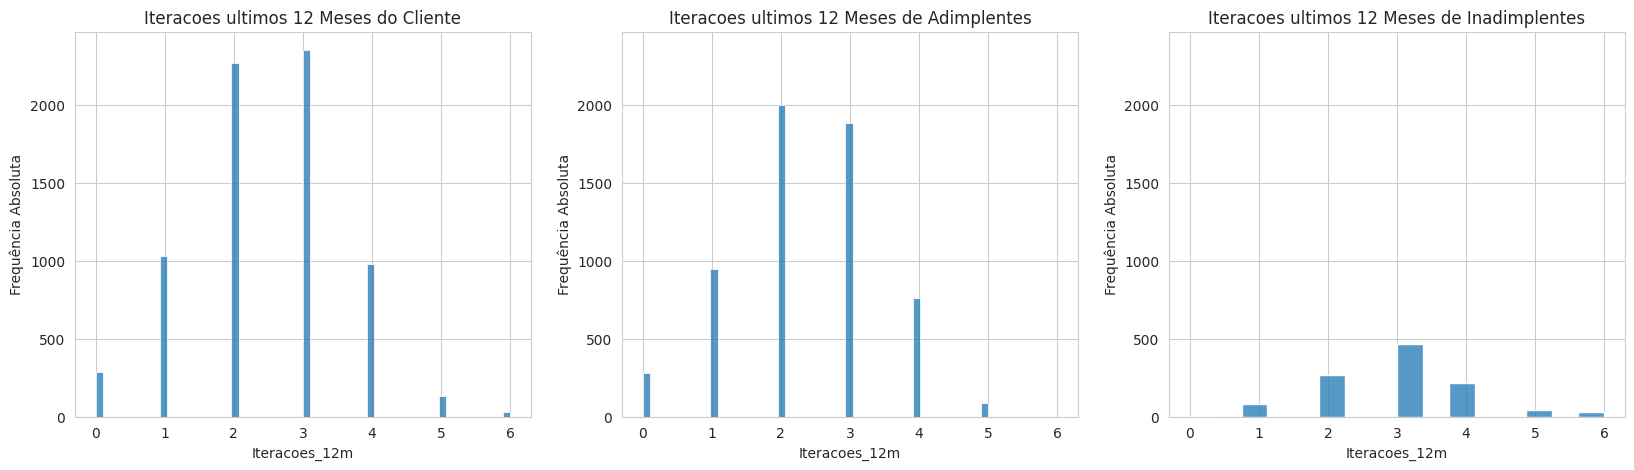

In [72]:
iteracoes_12m = grafico_numericos(coluna='iteracoes_12m',df=df,df_adimplente=df_adimplente,df_inadimplente=df_inadimplente)

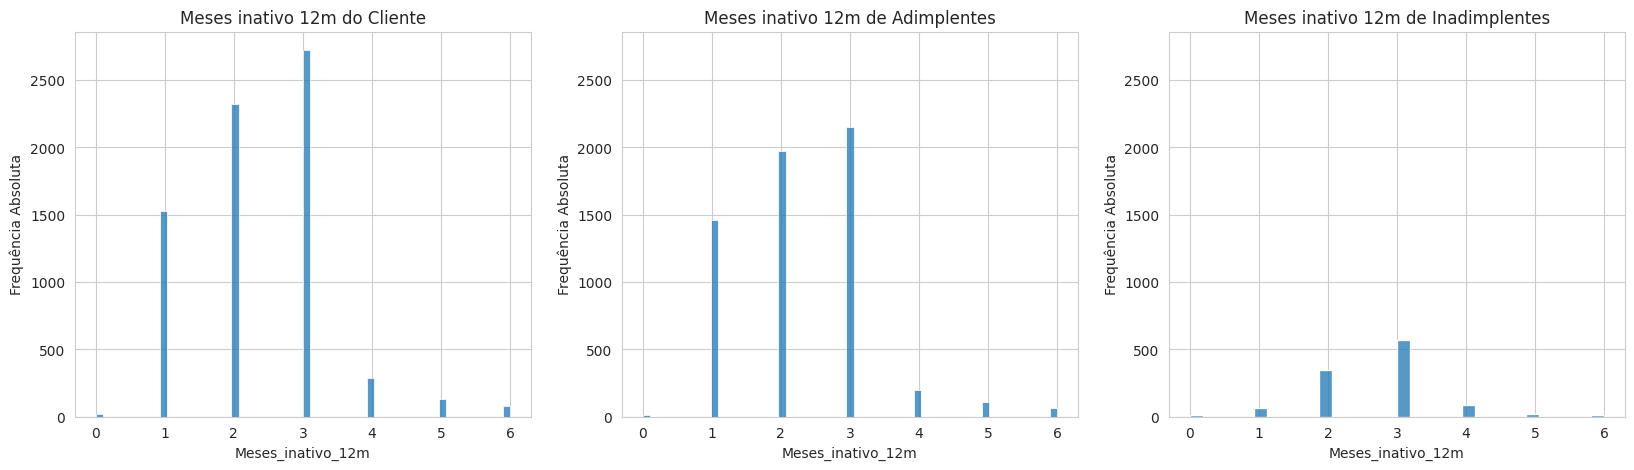

In [52]:
meses_inativo_12m = grafico_numericos(coluna='meses_inativo_12m',df=df,df_adimplente=df_adimplente,df_inadimplente=df_inadimplente)

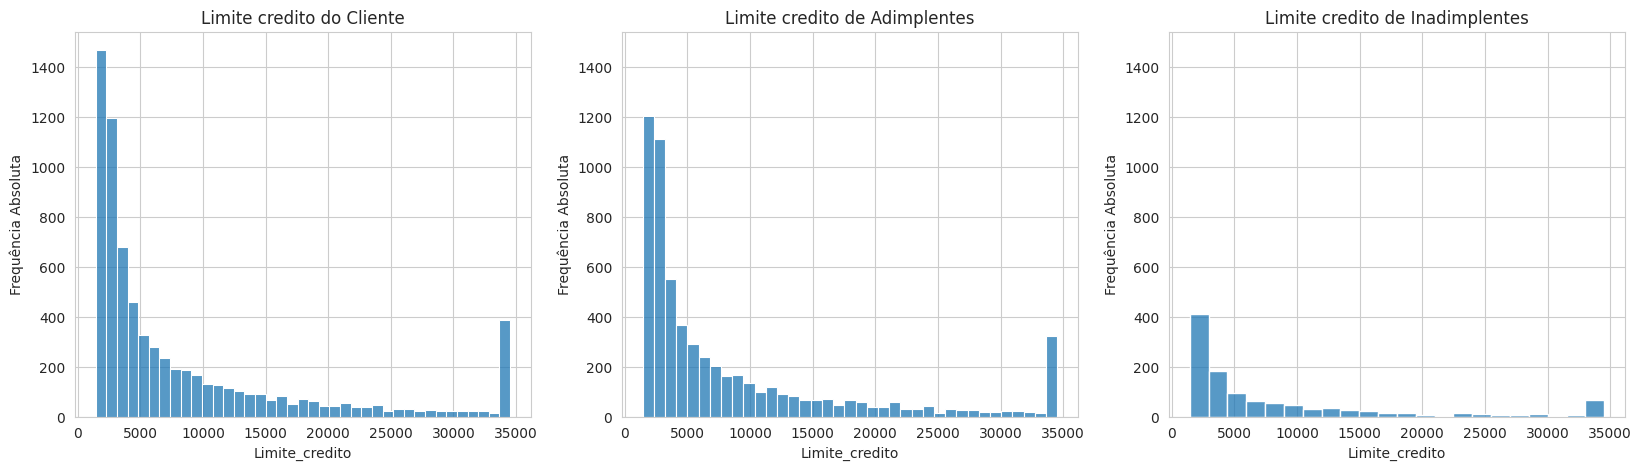

In [53]:
limite_credito = grafico_numericos(coluna='limite_credito',df=df,df_adimplente=df_adimplente,df_inadimplente=df_inadimplente)

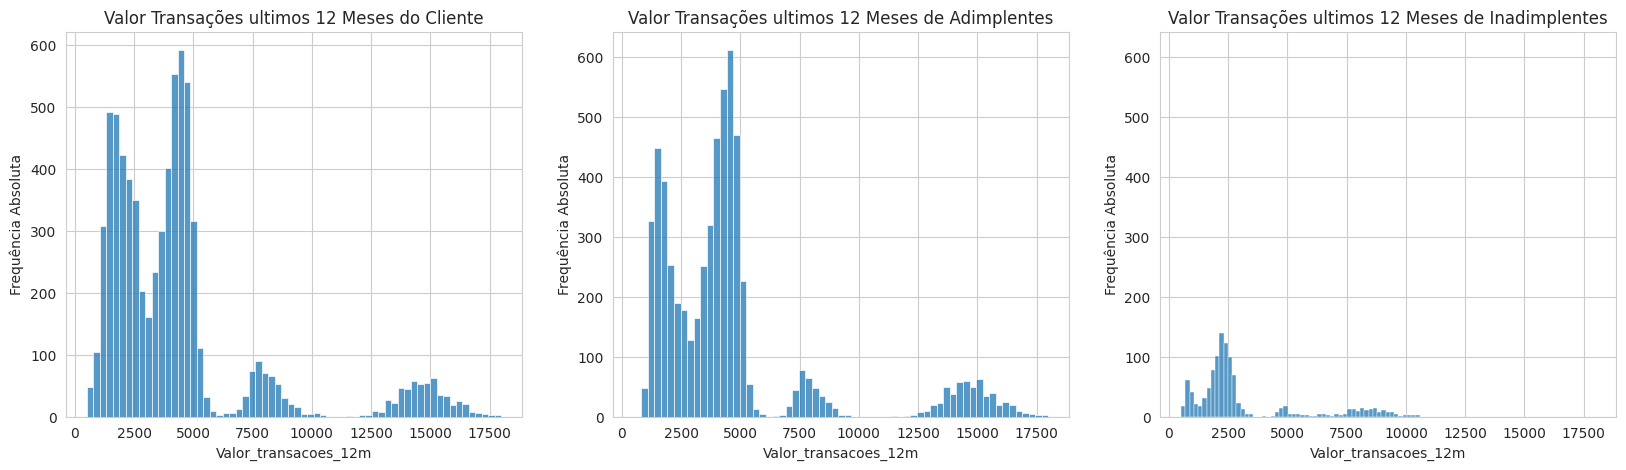

In [61]:
valor_transacoes_12m = grafico_numericos(coluna='valor_transacoes_12m',df=df,df_adimplente=df_adimplente,df_inadimplente=df_inadimplente)

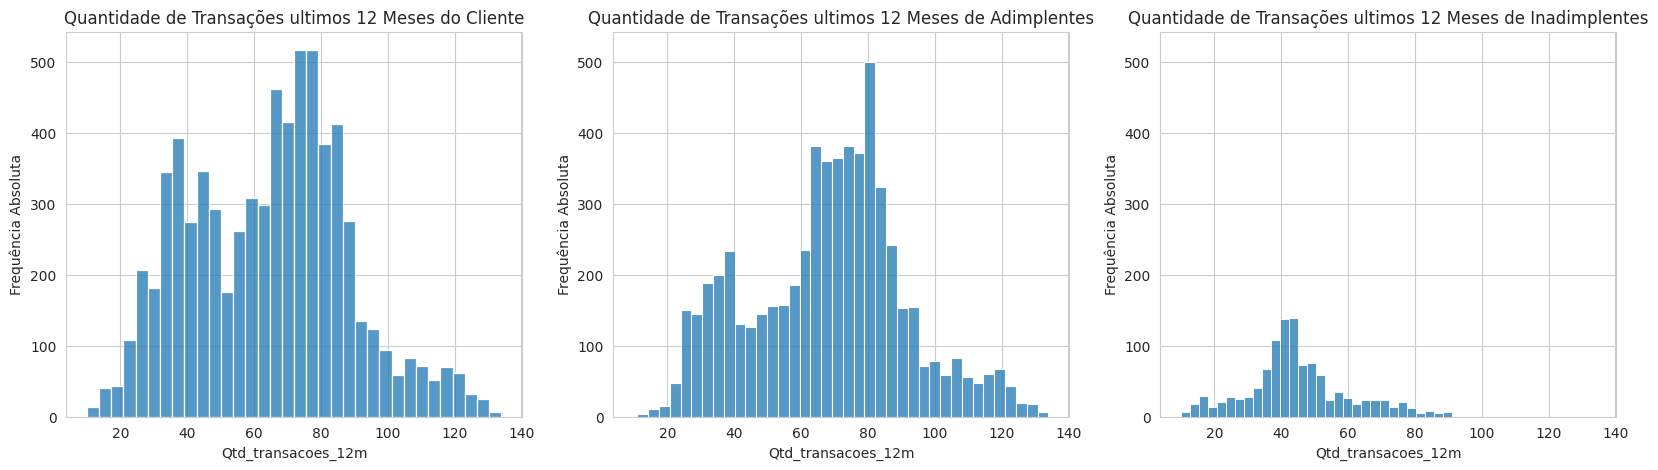

In [68]:
qtd_transacoes_12m = grafico_numericos(coluna='qtd_transacoes_12m',df=df,df_adimplente=df_adimplente,df_inadimplente=df_inadimplente)

A partir dos gráficos gerados podemos verificar quais são mais significantes para nosso estudo e em alguns casos relacionar dois gráficos para gerar novos dados para nossa analise, como comparar os valores com a quantidade de transações realizadas pelos clientes nos últimos doze meses.

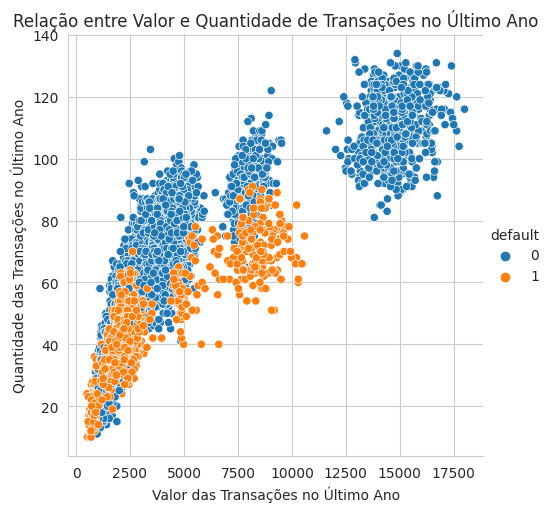

In [73]:
f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df, hue='default')
_ = f.set(
    title='Relação entre Valor e Quantidade de Transações no Último Ano',
    xlabel='Valor das Transações no Último Ano',
    ylabel='Quantidade das Transações no Último Ano'
  )

#5\. Storytelling e Insights

Com esse estudo conseguimos consultar um banco de dados CSV, verificar os tipos de dados cadastrados e como corrigir algum dado que tenha um tipo incorreto, seus dados faltantes e como deve ser tratados e interpretados pelo programa e o mais importa a interpretação e analise dos dados, para gerar observações e conclusões sobre o tema solicitado.

Após rever todos os pontos levantados no estudo foi possível perceber o seguinte:
<ol type="1">
  <li>Os atributos categóricos contribuem com muito pouco na modificação da variável resposta default, o comportamento desses atributos foi similar para os clientes adimplentes e inadimplentes;</li>
  <li>Os atributos numéricos são responsáveis pela definição da variável, mas nem todos os atributos;</li>
  <ol type="2">  
    <li>	Atributos como a idade, quantidade de dependentes, meses de relacionamento com a instituição, quantidade de produtos, iterações nos ultimo ano, meses inativos no ultimo ano e o limite do cartão de credito não tem uma grande variação entre os clientes;</li>
    <li>	Os atributos Valor das transações nos últimos 12 meses e quantidade de transações nos últimos 12 meses são onde apresentam o melhor ponto de observação para entender sobre a inadimplência dos clientes.</li>
    <li>	Quando cruzamos os dados de Valor e quantidade de transações nos últimos 12 meses encontraram as áreas de maior risco do cliente se tornar inadimplente, que são quantidades entre 20 e 60 com valores próximos a R$ 2.500,00 e quantidades entre 60 e 80 com valores próximos de R$ 8.000,00.</li>
    </ol>
</ol>